# Telco Customer Churn_ Meiying Xiang

## 1. Introduction

#### The dataset is customer behavior data from Telecom company. I want to know what factors are influcencing cutomer retaining or churning.

## 2. Prepare Data

### 2.1 Import Library

In [184]:
import pandas as pd         
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

### 2.1 Import Data

In [185]:
Telcodata = pd.read_csv('Telco.csv')
Telcodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### 2.2 Set up colors

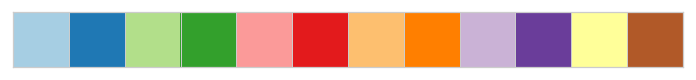

In [186]:
sns.palplot(sns.color_palette('Paired'))   # Setting up colors

### 2.3 Overview of data

In [187]:
Telcodata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [188]:
print(Telcodata.shape)

(7043, 21)


In [189]:
Telcodata.columns.values   # Get to know about the variables

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [190]:
Telcodata.dtypes  # Get to know about data type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2.4 Missing Values 

In [191]:
Telcodata.isnull().any()    # Check if there is null

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [192]:
Telcodata['TotalCharges'].str.isspace().any()  # Check to see if any space

True

In [193]:
Telcodata = Telcodata.replace(" ", np.nan)    # Replace space with nan
Telcodata['TotalCharges'].str.isspace().any()   

False

In [194]:
Telcodata = Telcodata[Telcodata['TotalCharges'].notnull()]

In [195]:
Telcodata['TotalCharges'] = pd.to_numeric(Telcodata['TotalCharges'],errors = 'coerce')  # Change data type
Telcodata.dtypes             

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [196]:
Telcodata['SeniorCitizen'] = Telcodata['SeniorCitizen'].apply(str)
Telcodata.dtypes 

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [197]:
Telcodata = Telcodata.drop(['customerID'], axis = 1)   #Drop useless data
Telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.4 Variable Overview

CUSTOMERS %CHURN:
No     73.42
Yes    26.58
Name: Churn, dtype: float64


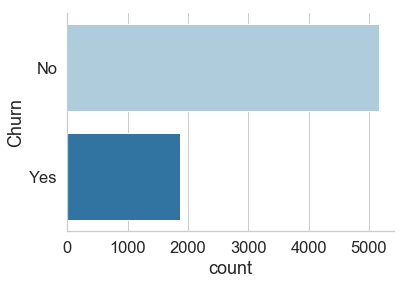

In [198]:
sns.set(style='whitegrid', color_codes=True, font_scale=1.5, palette = 'Paired') 
ax1 = sns.catplot(y="Churn", kind="count",data=Telcodata, height=4, aspect=1.5, orient='h') 
print("CUSTOMERS %CHURN:")
print(round(Telcodata['Churn'].value_counts(normalize=True) * 100,2))  # Check the churning customer proportion

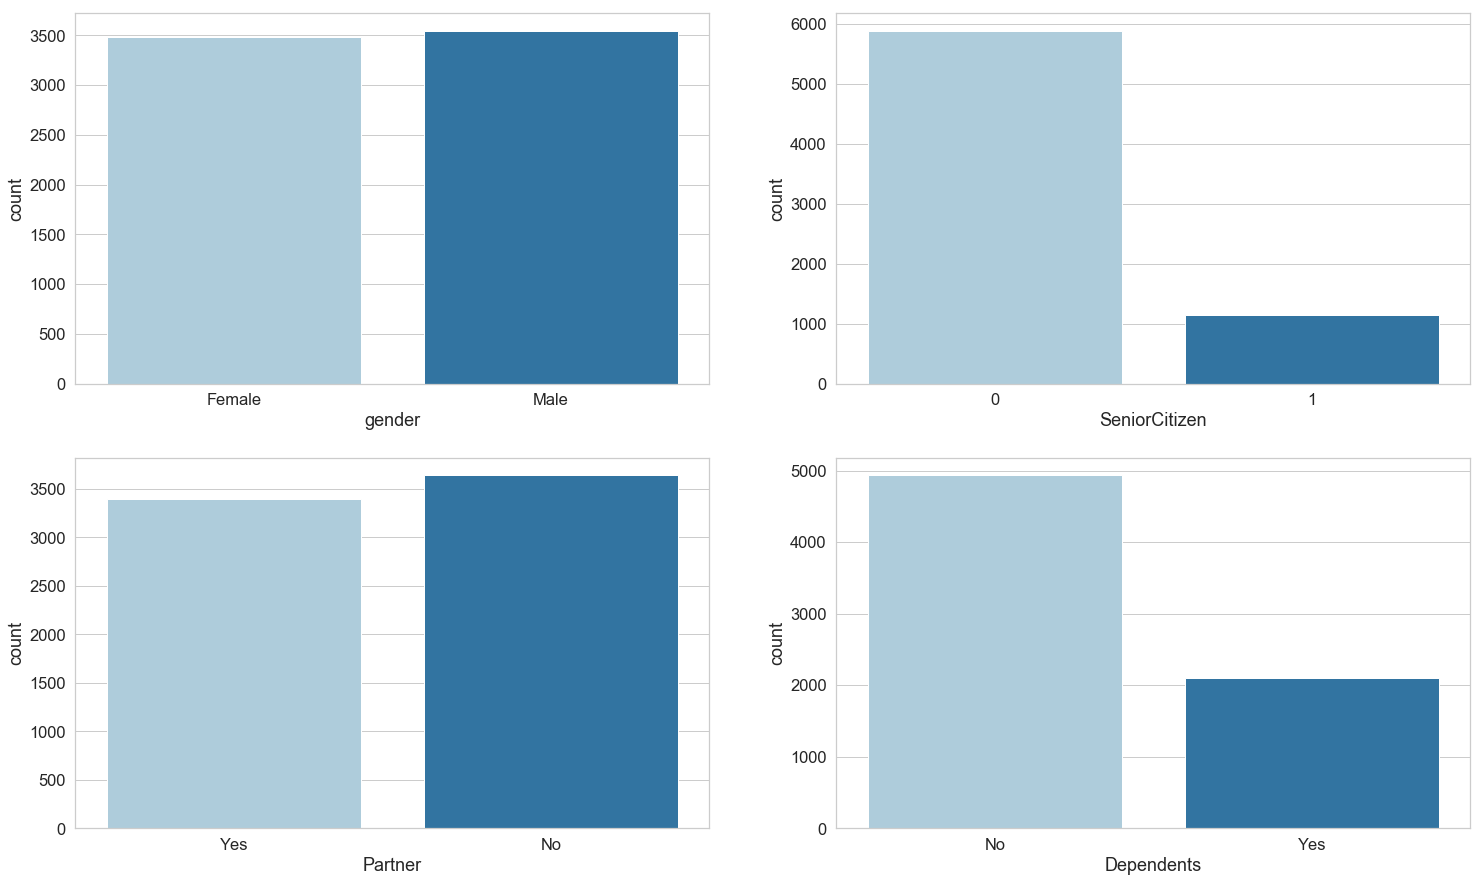

In [199]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (25,15))  # Check each data distribution
sns.countplot(x = 'gender', data = Telcodata, ax=axes[0][0])
sns.countplot(x = 'SeniorCitizen', data = Telcodata, ax=axes[0][1])
sns.countplot(x = 'Partner', data = Telcodata, ax=axes[1][0] )
sns.countplot(x = 'Dependents', data = Telcodata, ax=axes[1][1])

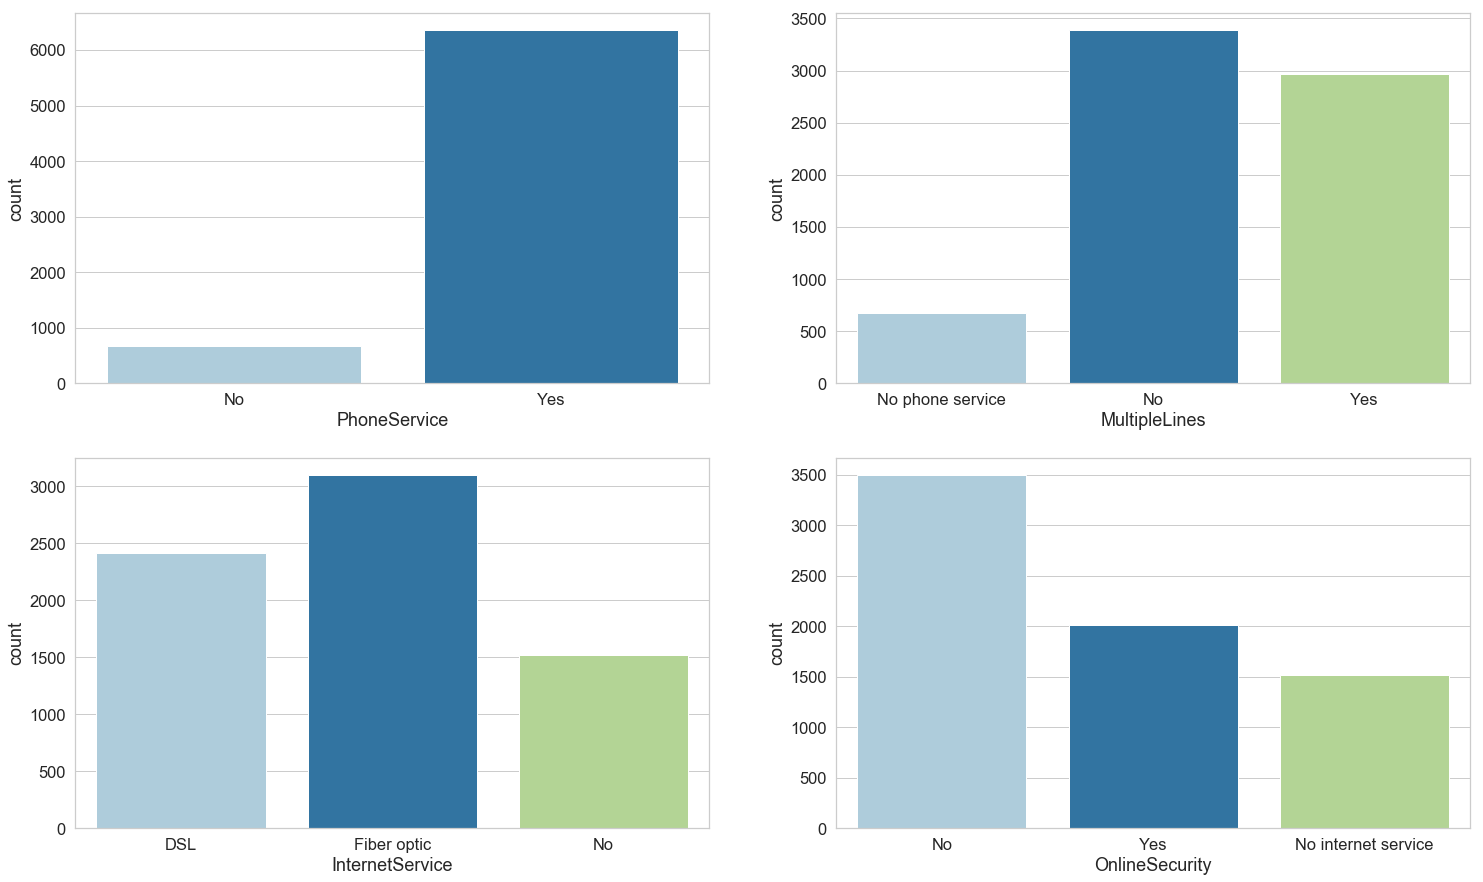

In [200]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (25,15))
sns.countplot(x = 'PhoneService', data = Telcodata, ax=axes[0][0])
sns.countplot(x = 'MultipleLines', data = Telcodata, ax=axes[0][1])
sns.countplot(x = 'InternetService', data = Telcodata, ax=axes[1][0])
sns.countplot(x = 'OnlineSecurity', data = Telcodata, ax=axes[1][1])

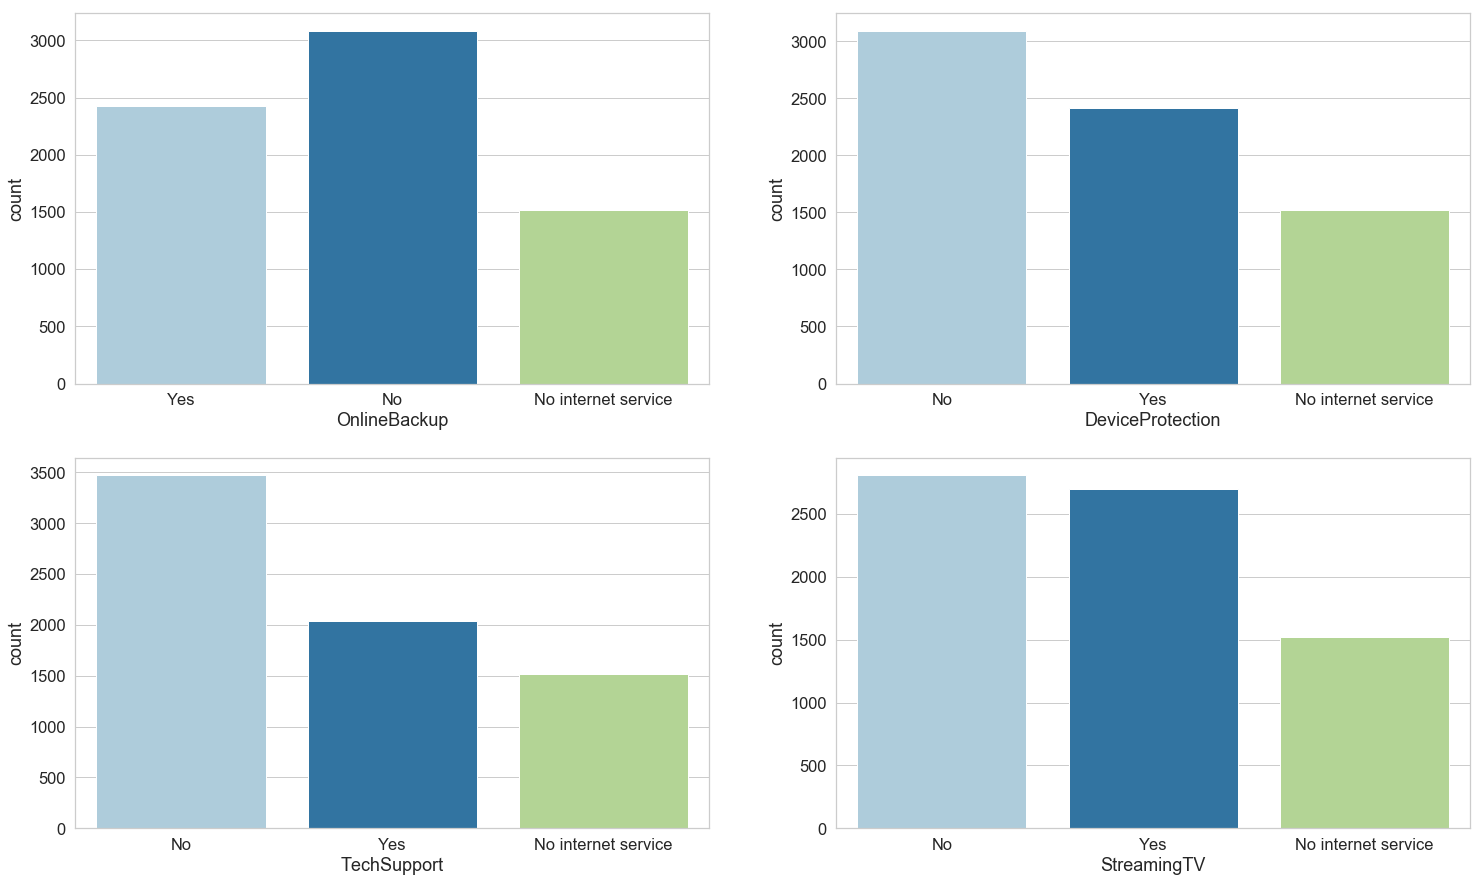

In [201]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (25,15))
sns.countplot(x = 'OnlineBackup', data = Telcodata, ax=axes[0][0])
sns.countplot(x = 'DeviceProtection', data = Telcodata, ax=axes[0][1])
sns.countplot(x = 'TechSupport', data = Telcodata, ax=axes[1][0])
sns.countplot(x = 'StreamingTV', data = Telcodata, ax=axes[1][1])

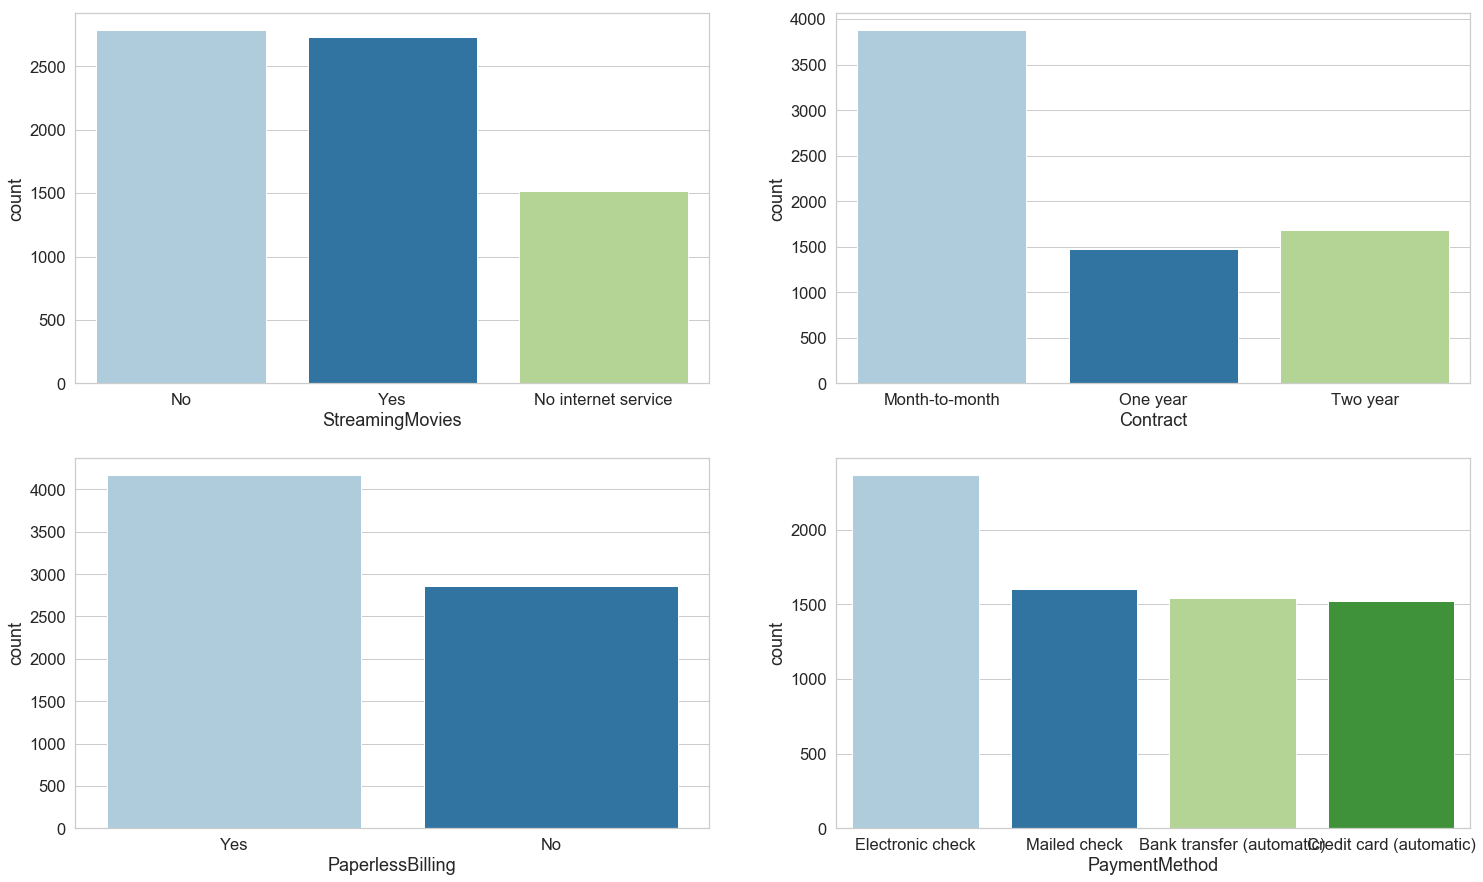

In [202]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (25,15))
sns.countplot(x = 'StreamingMovies', data = Telcodata, ax=axes[0][0])
sns.countplot(x = 'Contract', data = Telcodata, ax=axes[0][1])
sns.countplot(x = 'PaperlessBilling', data = Telcodata, ax=axes[1][0])
sns.countplot(x = 'PaymentMethod', data = Telcodata, ax=axes[1][1])

/Users/may/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


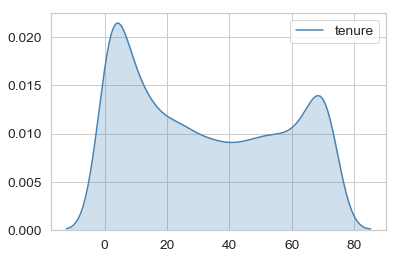

In [203]:
sns.set(style='whitegrid', color_codes=True, font_scale=1.25) 
ax2 = sns.kdeplot(Telcodata["tenure"], shade=True, color='steelblue')

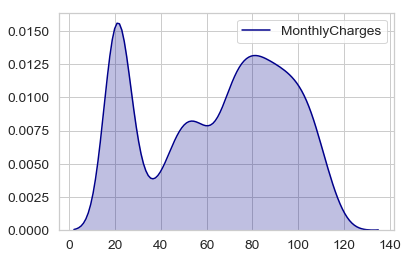

In [204]:
ax3 = sns.kdeplot(Telcodata["MonthlyCharges"], shade=True, color='darkblue')

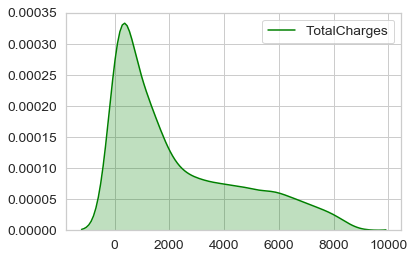

In [205]:
ax4 = sns.kdeplot(Telcodata["TotalCharges"], shade=True, color='green')

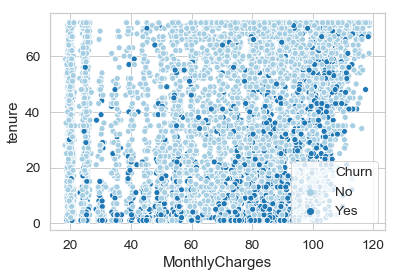

In [206]:
sns.scatterplot(x="MonthlyCharges", y="tenure", hue="Churn",
                     data=Telcodata, palette = 'Paired')

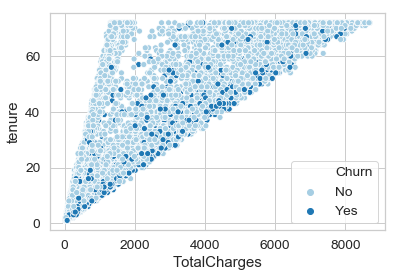

In [207]:
sns.scatterplot(x="TotalCharges", y="tenure", hue="Churn",
                     data=Telcodata,palette = 'Paired')

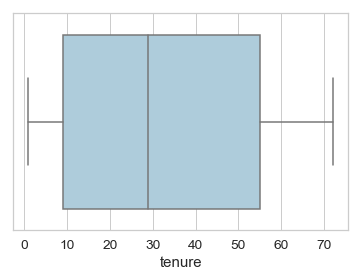

In [208]:
sns.boxplot(x = Telcodata["tenure"], palette = 'Paired')

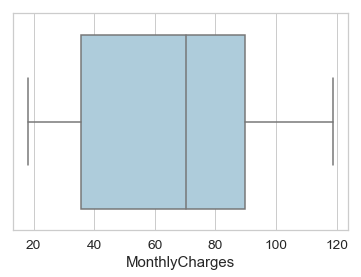

In [209]:
sns.boxplot(x = Telcodata["MonthlyCharges"], color='orange',palette = 'Paired')

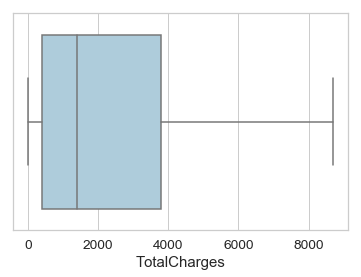

In [210]:
sns.boxplot(x = Telcodata["TotalCharges"], palette = 'Paired')

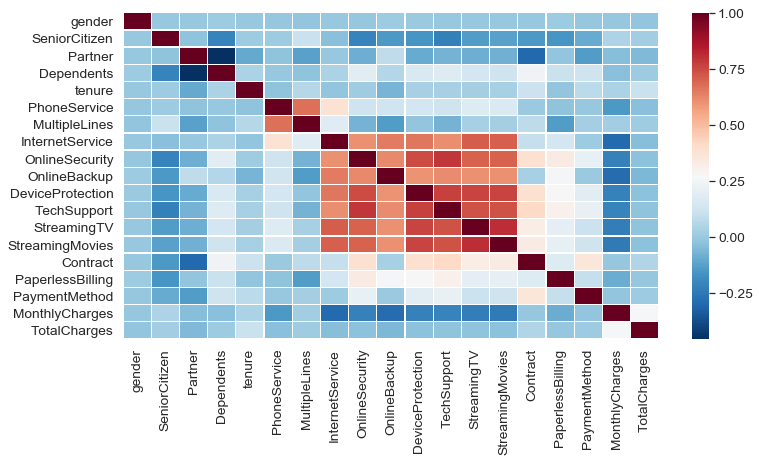

In [211]:
plt.figure(figsize=(12, 6))
Telcodata1 = Telcodata.drop(['Churn'], axis=1)
corr = Telcodata1.apply(lambda x: pd.factorize(x)[0]).corr()
ax6 = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap='RdBu_r')


## 3. Modeling

### 3.1 Split train and test data

In [212]:
Telcodata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [213]:
x_train = Telcodata.drop('Churn',axis=1)
y_train = Telcodata['Churn']

In [214]:
x_train=pd.get_dummies(x_train)

In [215]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [216]:
y_train.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

In [218]:
x_train.shape

(6328, 46)

In [219]:
y_train.shape

(6328,)

In [220]:
x_test.shape

(704, 46)

In [221]:
y_test.shape

(704,)

In [222]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

/Users/may/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/may/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Users/may/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### 3.2 Random Forest Classifier & Feature Selection

In [223]:
Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(x_train, y_train)

/Users/may/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [224]:
rf = RandomForestClassifier(n_estimators = 3, random_state = 1)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))

0.7613636363636364


In [225]:
reportrf = classification_report(y_test, rf.predict(x_test))
print(reportrf)

              precision    recall  f1-score   support

          No       0.80      0.88      0.84       492
         Yes       0.64      0.49      0.55       212

   micro avg       0.76      0.76      0.76       704
   macro avg       0.72      0.68      0.69       704
weighted avg       0.75      0.76      0.75       704



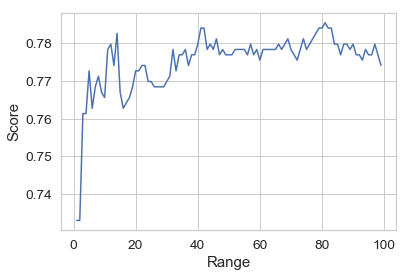

In [226]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,100),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [227]:
rf = RandomForestClassifier(n_estimators = 39, oob_score = True,random_state = 1)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))

0.7769886363636364


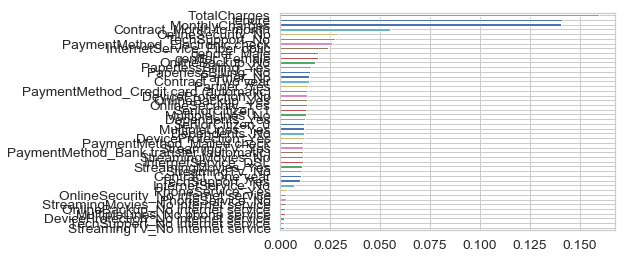

In [228]:
importances = rf.feature_importances_
weights = pd.Series(importances,index=x_train.columns.values)
weights.sort_values().plot(kind = 'barh')

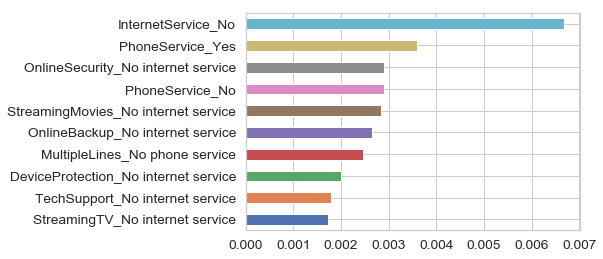

In [229]:
importances = rf.feature_importances_
weights = pd.Series(importances,index=x_train.columns.values)
weights.sort_values()[:10].plot(kind = 'barh')

In [230]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  15


In [231]:
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)

x_train.shape, x_test.shape

((6328, 31), (704, 31))

In [232]:
scaler = StandardScaler()
scaler.fit(x_train.fillna(0))

/Users/may/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [233]:
sel_ = SelectFromModel(LogisticRegression(C=1, solver='liblinear', penalty='l1'))
sel_.fit(scaler.transform(x_train.fillna(0)), y_train)

/Users/may/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [234]:
sel_.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True, False])

In [235]:
selected_feat = x_train.columns[(sel_.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 31
selected features: 21
features with coefficients shrank to zero: 10


In [236]:
removed_feats = x_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['MonthlyCharges', 'InternetService_DSL', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingMovies_No', 'Contract_One year',
       'PaymentMethod_Mailed check'],
      dtype='object')

In [237]:
x_train_selected = sel_.transform(x_train.fillna(0))
x_test_selected = sel_.transform(x_test.fillna(0))

x_train_selected.shape, x_test_selected.shape

((6328, 21), (704, 21))

In [238]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=400))
sel_.fit(x_train, y_train)

# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
x_train_rf = pd.DataFrame(sel_.transform(x_train))
x_test_rf = pd.DataFrame(sel_.transform(x_test))

# add the columns name
x_train_rf.columns = x_train.columns[(sel_.get_support())]
x_test_rf.columns = x_train.columns[(sel_.get_support())]

In [239]:
x_train_rf.shape, x_test_rf.shape

((6328, 6), (704, 6))

In [240]:
#X_train = x_train[['tenure','MonthlyCharges','TotalCharges','gender_Female','gender_Male','SeniorCitizen_0',
#                  'SeniorCitizen_1','Partner_No','Partner_Yes','Dependents_No','Dependents_Yes','MultipleLines_No',
#                  'MultipleLines_Yes','InternetService_DSL','InternetService_Fiber optic','OnlineSecurity_No',
#                  'OnlineSecurity_Yes','OnlineBackup_No','OnlineBackup_Yes','DeviceProtection_No'
#                   ,'DeviceProtection_Yes','TechSupport_No','TechSupport_Yes','StreamingTV_No','StreamingTV_Yes',
#                  'StreamingMovies_No','StreamingMovies_Yes','Contract_Month-to-month','Contract_One year',
#                  'Contract_Two year','PaperlessBilling_No','PaperlessBilling_Yes',
#                   'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
#                   'PaymentMethod_Electronic check','PaymentMethod_Mailed check']]
#Y_train = Telcodata['Churn']

In [241]:
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

In [242]:
#x_train.drop(labels=corr_features, axis=1, inplace=True)
#x_test.drop(labels=corr_features, axis=1, inplace=True)

#x_train.shape, x_test.shape

In [243]:
rf = RandomForestClassifier(n_estimators = 39, random_state = 1)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))

0.7727272727272727


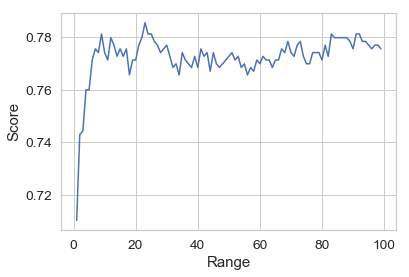

In [244]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,100),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [245]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 1)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))

0.7798295454545454


### 3.3 Logistic Regression

In [246]:
lr = LogisticRegression()
fitted = lr.fit(x_train, y_train)
pred = lr.predict(x_test)
accuracy = lr.score(x_test,y_test)
print(accuracy)

0.7897727272727273


/Users/may/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


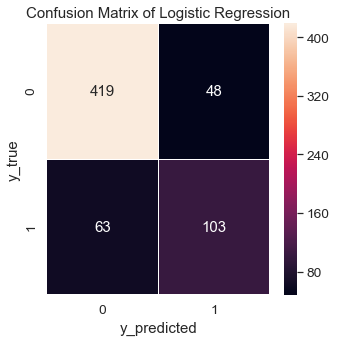

In [55]:
cm_lr = confusion_matrix(y_test,lr.predict(x_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()


In [56]:
report = classification_report(y_test, lr.predict(x_test))
print(report)

              precision    recall  f1-score   support

          No       0.87      0.90      0.88       467
         Yes       0.68      0.62      0.65       166

   micro avg       0.82      0.82      0.82       633
   macro avg       0.78      0.76      0.77       633
weighted avg       0.82      0.82      0.82       633



### 3.3 SVM

In [57]:
svc = SVC(kernel='rbf',max_iter=-1, gamma='auto')
svc_fitted = svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_scores = svc.score(x_test,y_test)
print("SVC Regression scores is..:" + str(svc.score(x_test,y_test)))

SVC Regression scores is..:0.7725118483412322


In [58]:
reportsvm = classification_report(y_test, svc.predict(x_test))
print(reportsvm)

              precision    recall  f1-score   support

          No       0.80      0.93      0.86       467
         Yes       0.63      0.33      0.43       166

   micro avg       0.77      0.77      0.77       633
   macro avg       0.71      0.63      0.64       633
weighted avg       0.75      0.77      0.75       633



### 3.4 KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7740916271721959


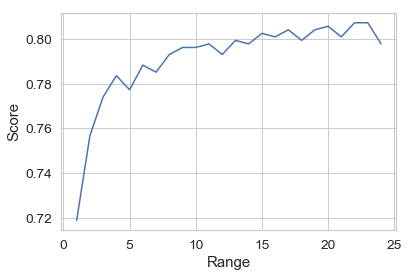

In [60]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [61]:
knn = KNeighborsClassifier(n_neighbors = 8) 
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7930489731437599


In [62]:
reportknn = classification_report(y_test, knn.predict(x_test))
print(reportknn)

              precision    recall  f1-score   support

          No       0.81      0.93      0.87       467
         Yes       0.68      0.40      0.50       166

   micro avg       0.79      0.79      0.79       633
   macro avg       0.75      0.67      0.69       633
weighted avg       0.78      0.79      0.77       633



### 3.5 Xgboost

In [63]:
xgb = XGBClassifier(n_estimators=800, n_jobs=-1)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print ("\naccuracy_score :",accuracy_score(y_test, predictions))


accuracy_score : 0.8088467614533965


In [64]:
reportxgb = classification_report(y_test, xgb.predict(x_test))
print(reportxgb)

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       467
         Yes       0.65      0.60      0.62       166

   micro avg       0.81      0.81      0.81       633
   macro avg       0.75      0.74      0.75       633
weighted avg       0.80      0.81      0.81       633

